In [22]:
import numpy as np
import pandas as pd

data_mahasiswa = pd.read_csv("D:\My Prog\PYTHON PROG\Data Mahasiswa.csv")
data_mahasiswa

,mahasiswa,ipk,gaji
0,Adi,3.00,10
1,Budi,2.99,1


In [23]:
# data ipk
data_ipk = np.array(data_mahasiswa)
data_ipk = data_ipk[:, [0,1]]
ipk_A = np.sum(data_ipk [0:1,1], axis=0)
ipk_B = np.sum(data_ipk [1:2,1], axis=0)
print("ipk_A: ", ipk_A)
print("ipk_B: ", ipk_B)

ipk_A:  3.0
ipk_B:  2.99


In [24]:
# Data Gaji

data_gaji = np.array(data_mahasiswa)
data_gaji = data_gaji[:, [0,2]]
gaji_A = np.sum(data_gaji [0:1,1], axis=0)
gaji_B = np.sum(data_gaji [1:2,1], axis=0)
print("gaji_A: ", gaji_A)
print("gaji_B: ", gaji_B)

gaji_A:  10
gaji_B:  1


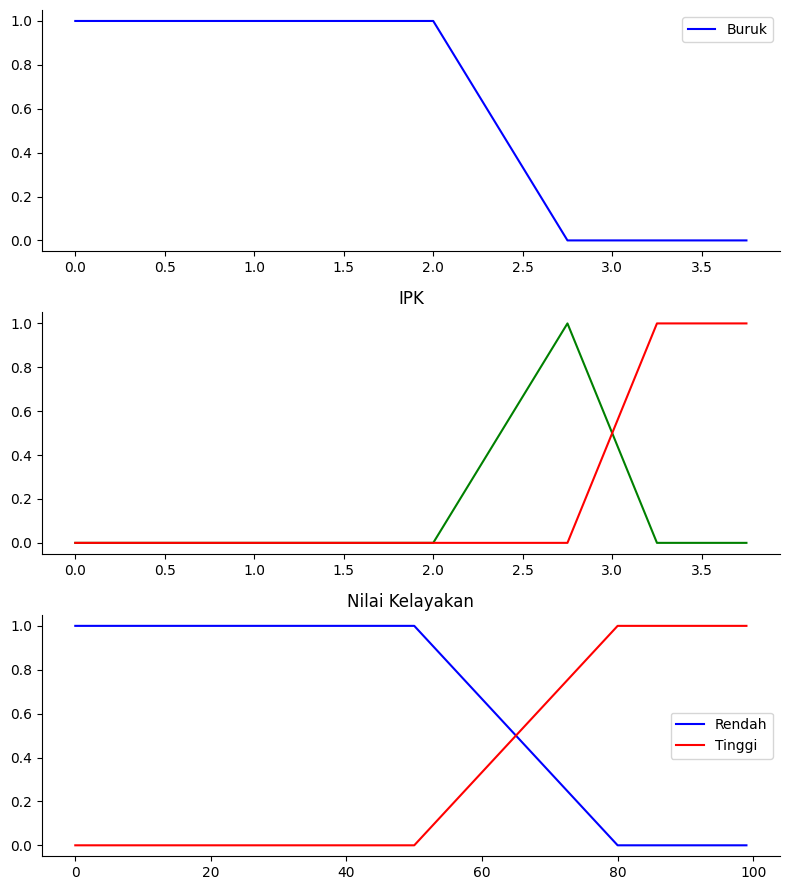

In [25]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Semesta Pembicaraan
x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

# Membership Function
# ipk
ipk_buruk = fuzz.trapmf(x_ipk, [0, 0, 2, 2.75])
ipk_cukup = fuzz.trimf(x_ipk, [2, 2.75, 3.25])
ipk_bagus = fuzz.trapmf(x_ipk, [2.75, 3.25, 4, 4])

# Gaji
gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

# Nilai Kelayakan
nk_rendah = fuzz.trapmf(x_nk, [0, 0, 50, 80])
nk_tinggi = fuzz.trapmf(x_nk, [50, 80, 100, 100])

# Kurva Membership Function
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax1.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax1.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax1.set_title('IPK')
ax0.legend()

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()


In [27]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Fungsi keanggotaan IPK
def fungsikeanggotaan_IPK(_nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, _nilai)
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, _nilai)
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, _nilai)

    return buruk, cukup, bagus

# Fungsi keanggotaan Gaji
def fungsikeanggotaan_gaji(_nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, _nilai)
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, _nilai)
    besar = fuzz.interp_membership(x_gaji, gaji_besar, _nilai)
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, _nilai)

    return kecil, sedang, besar, sangat_besar

# Menghitung derajat keanggotaan IPK
ipk_mhsA = fungsikeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsikeanggotaan_IPK(ipk_B)

print("ipk mhsA : ", ipk_mhsA)
print("ipk mhsB : ", ipk_mhsB)

# Menghitung derajat keanggotaan Gaji
gaji_mhsA = fungsikeanggotaan_gaji(gaji_A)
gaji_mhsB = fungsikeanggotaan_gaji(gaji_B)

print("Gaji mhsA : ", gaji_mhsA)
print("Gaji mhsB : ", gaji_mhsB)



ipk mhsA :  (0.0, 0.5, 0.5)
ipk mhsB :  (0.0, 0.5199999999999996, 0.4800000000000004)
Gaji mhsA :  (0.0, 0.0, 0.4, 0.6)
Gaji mhsB :  (1.0, 0.0, 0.0, 0.0)


In [28]:
nk_7 = np.fmin(ipk_mhsA[1], gaji_mhsA[2])  # rule 7
nk_8 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])  # rule 8
nk_11 = np.fmin(ipk_mhsA[2], gaji_mhsA[2])  # rule 11
nk_12 = np.fmin(ipk_mhsA[2], gaji_mhsA[3])  # rule 12

mhsA_nk_rendah = np.fmax(nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai kelayakan mhs A")
print("NK rendah : ", mhsA_nk_rendah)
print("NK tinggi : ", mhsA_nk_tinggi)

Nilai kelayakan mhs A
NK rendah :  0.5
NK tinggi :  0.4


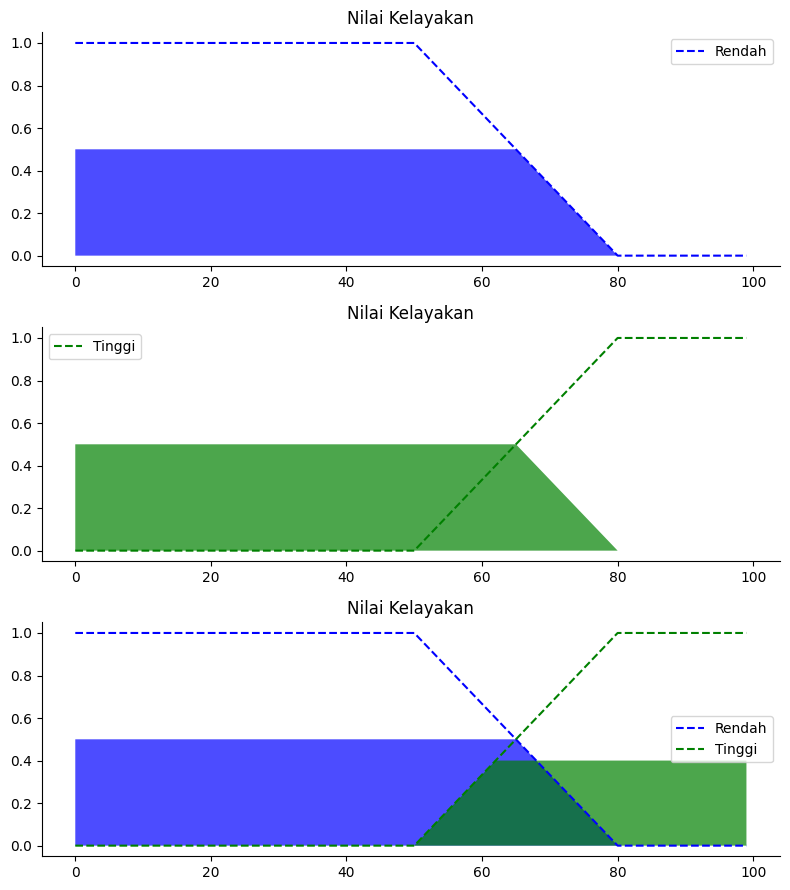

In [29]:
# Plot Nilai Kelayakan
mhsA_nk_rendah = np.fmin(mhsA_nk_rendah, nk_rendah)
mhsA_nk_tinggi = np.fmin(mhsA_nk_tinggi, nk_tinggi)

# titik awal arsir
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

# Visualisasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsA_nk_rendah, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Mematikan sumbu atas dan kanan
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [31]:
#rule 5.IF IPK Cukup AND Gaji Kecil THEN NK = Tinggi 
nk_5 = np.fmin(ipk_mhsB[1],gaji_mhsB[0])

#rule 5. IF IPK Cukup AND Gaji Sedang THEN NK Rendah 
nk_6 = np.fmin(ipk_mhsB[1], gaji_mhsB[1])

#rule 9.IF IPK Baguş AND Gaji Kecil THEN NK = Tinggi 
nk_9 = np.fmin(ipk_mhsB [2],gaji_mhsB[0])

#rule 10. IF IPK Bagus AND Gaji Sedang THEN NK = Tinggi 
nk_10 = np.fmin (ipk_mhsB [2], gaji_mhsB[1])

mhsB_nk_tinggi = np.fmax(nk_5, np.fmax(nk_9, nk_10))
mhsB_nk_rendah = nk_6

print("Nilai Kelayakan mhs B")
print("NK rendah", mhsB_nk_rendah)
print("NK tinggi", mhsB_nk_tinggi)

Nilai Kelayakan mhs B
NK rendah 0.0
NK tinggi 0.5199999999999996


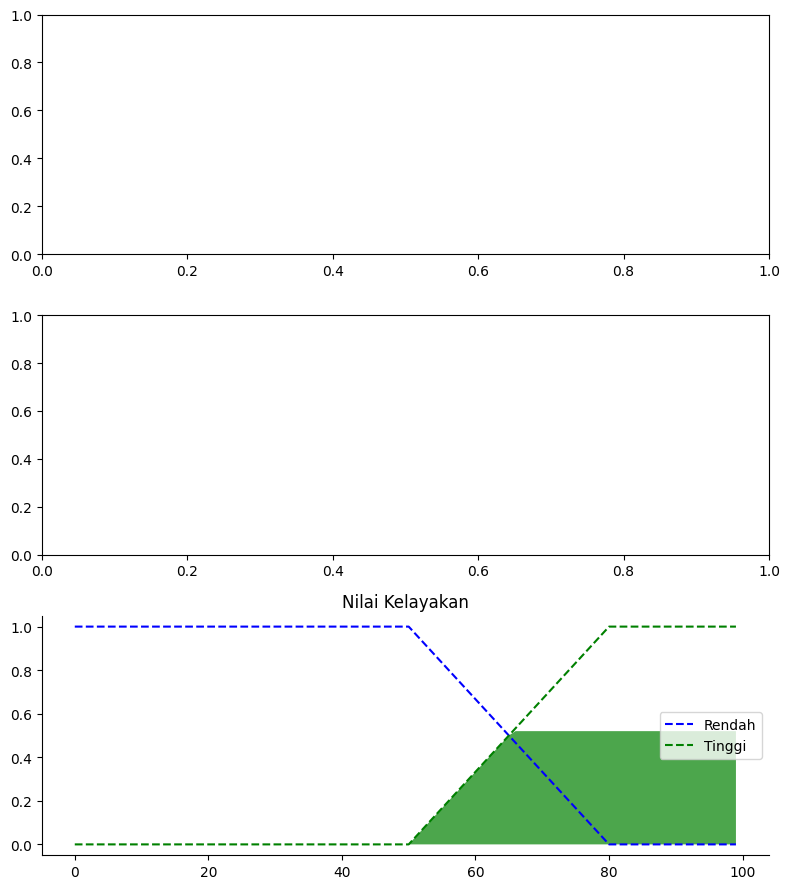

In [32]:
#Untuk Plot Arsir, pakai np.fmin
mhsB_nk_rendah = np.fmin(mhsB_nk_rendah, nk_rendah)

mhsB_nk_tinggi = np.fmin(mhsB_nk_tinggi, nk_tinggi)

#titik awal arsir 
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

#  Visualize this

fig, (axe, axi, ax2) = plt.subplots (nrows=3, figsize=(8, 9))

#x_nk rendah np.arrange(0, 801)

ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsB_nk_rendah, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Mematikan sumbu atas dan kanan
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Nilai kelayakan Mhs A :  47.16432432432437
Nilai Fuzzy untuk membership function:  0.5


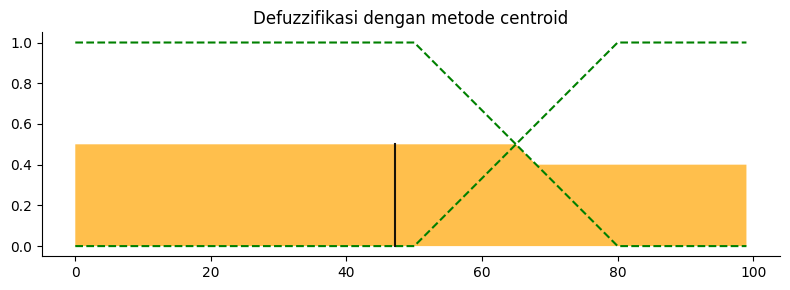

In [33]:
# Komposisi Aturan
komposisi = np.fmax(mhsA_nk_rendah, mhsA_nk_tinggi)

# Hasil Defuzzifikasi
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai kelayakan Mhs A : ", nk)


# Nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
print("Nilai Fuzzy untuk membership function: ", nk_defuzzy)

# Visualisasi Hasil Defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi') 
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Matikan sumbu atas dan kanan
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()

Nilai kelayakan Mhs B  :  78.15624027388732
Nilai Fuzzy untuk membership function:  0.5199999999999996


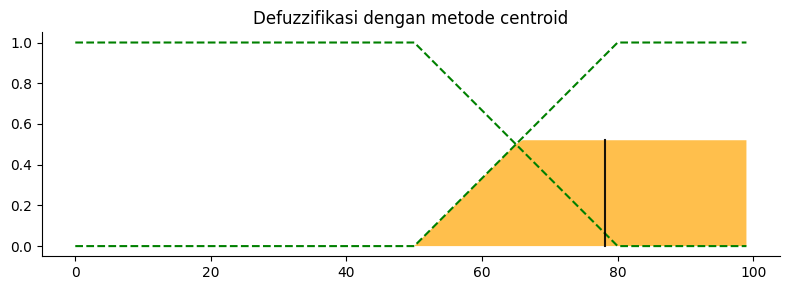

In [34]:
# Komposisi Aturan
komposisi = np.fmax(mhsB_nk_rendah, mhsB_nk_tinggi)

# Hasil Defuzzifikasi
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai kelayakan Mhs B  : ", nk)


# Nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
print("Nilai Fuzzy untuk membership function: ", nk_defuzzy)

# Visualisasi Hasil Defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi') 
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Matikan sumbu atas dan kanan
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()